# Курсовая работа.
## GeekBrains.
# Библиотеки Python для Data Science(Продолжение): Numpy, Matplotlib, Scikit-learn.
## Виталий Казанцев.

### Подключение необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

### Постановка задачи

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Пути к датасетам

In [4]:
TRAIN_DATASET_PATH = './data/project_task/course_project_train.csv'
TEST_DATASET_PATH = './data/project_task/course_project_test.csv'

### Загрузка данных
#### Описание датасета
* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0
7499,Rent,NaN,4 years,0.0,8.0,9.4,480832.0,0.0,NaN,0.0,debt consolidation,Short Term,26928.0,288192.0,9061.0,NaN,0


In [6]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0
2499,Rent,1694439.0,10+ years,0.0,12.0,18.4,1199748.0,1.0,72.0,0.0,debt consolidation,Long Term,763004.0,559531.0,23440.0,6820.0


In [7]:
train_df.shape[1] - 1  == test_df.shape[1]

True

### Обзор данных

In [8]:
print(
    f'Размер тренировочных данных: {train_df.shape}\n'
    f'Размер тестовых данных: {test_df.shape}'
)

Размер тренировочных данных: (7500, 17)
Размер тестовых данных: (2500, 16)


#### Тип данных

In [9]:
train_df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

### Количественные признаки

In [10]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


* Annual Income - Доход свыше 10 млн., возможно придется принять за выброс
* Tax Liens - налговые обременения, максимальное 7, при этом квантили  и минимальное значения нули, возможно незначитальный признак для определения целевой переменной.
* Number of open accounts - максимальное значение 43, очень большое число открытых счетов.
* Years of Credit History - 57 лет кредитной истории
* Bankruptcies - возможно незначительный признак

### Категориальные признаки

In [11]:
cat_features = train_df.select_dtypes(include='object').columns.tolist()
cat_features

['Home Ownership', 'Years in current job', 'Purpose', 'Term']

In [12]:
for col in cat_features:
    print(f'{col}:\n\n{train_df[col].value_counts()}\n{"*" * 50}\n')

Home Ownership:

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
**************************************************

Years in current job:

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
**************************************************

Purpose:

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64
*********************

In [13]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [14]:
train_df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

### Целевая переменная

In [15]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

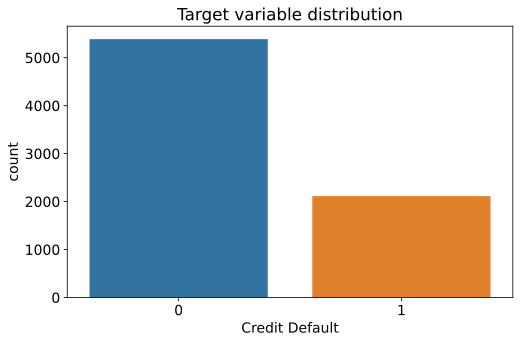

In [16]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Credit Default', data=train_df)

plt.title('Target variable distribution')
plt.show()


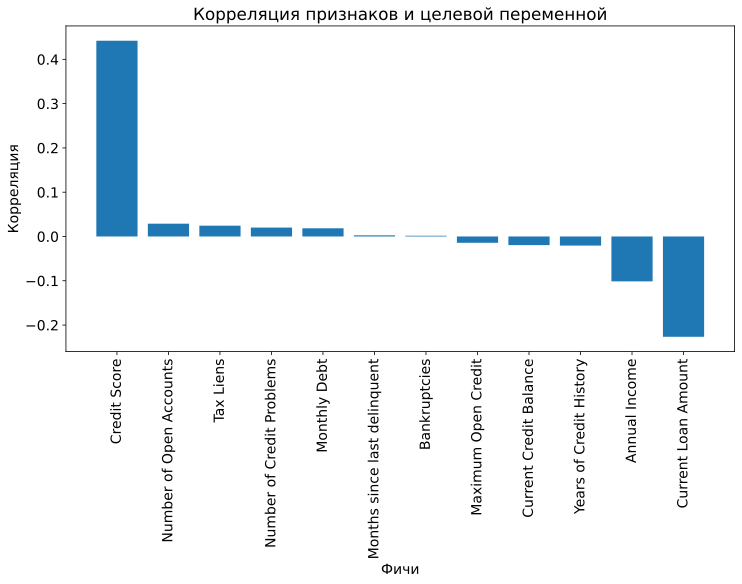

In [17]:
correlations = train_df.corrwith(train_df['Credit Default']).sort_values(ascending=False)
correlations.drop('Credit Default', inplace=True)
plt.figure(figsize=(12,6))
plt.bar(correlations.index, correlations)
plt.xticks(rotation='90')
plt.ylabel('Корреляция')
plt.xlabel('Фичи')
plt.title('Корреляция признаков и целевой переменной')
plt.show()



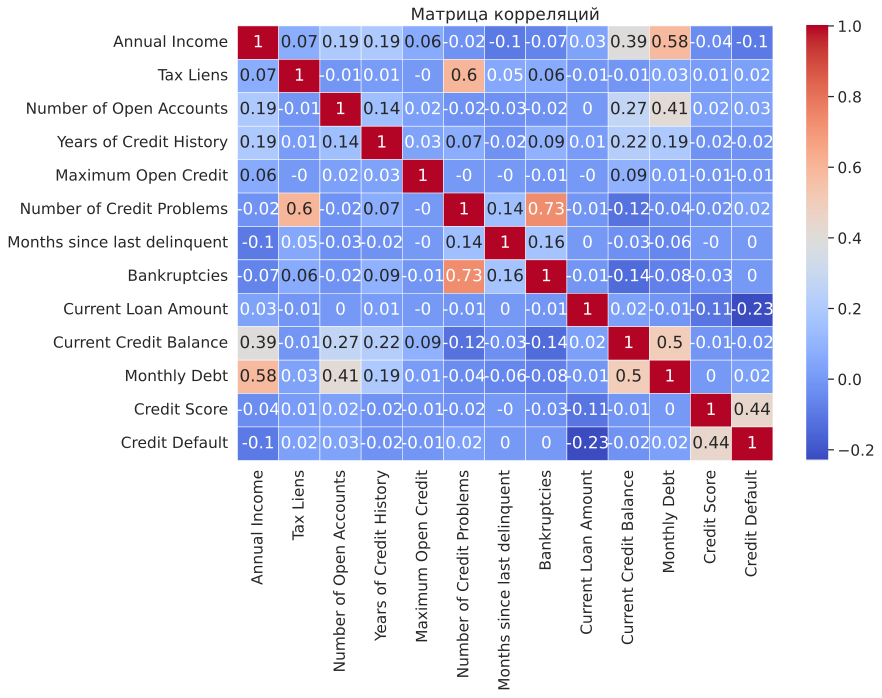

In [18]:
sns.set(font_scale=1.4)
plt.figure(figsize=(12,8))

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
# corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()



### Обработка выбросов и пропусков

#### Annual Income

In [19]:
train_df['Annual Income'].value_counts().sort_index()

164597.0      1
175845.0      1
177251.0      1
191577.0      1
192223.0      1
             ..
8710740.0     1
8758449.0     1
8923844.0     1
9338880.0     1
10149344.0    1
Name: Annual Income, Length: 5478, dtype: int64

In [20]:
train_df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [21]:
train_df['Annual Income'].isna().sum()

1557

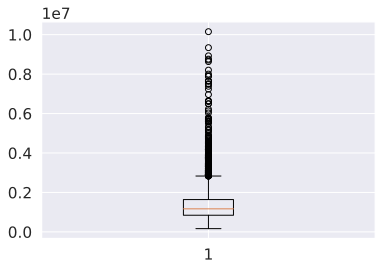

In [22]:
df = train_df[train_df['Annual Income'].notna()]
plt.boxplot(df['Annual Income'])
plt.show()

Таким образом по признакку Annual Income мы имеем достаточно большое количество выбросов, доходы свыше трех миллионов, а также 1557 пропусков. Заменим выбросы и пропуски на медиану.

In [23]:
train_df['Annual Income'].median()

1168386.0

In [24]:
def annual_income(df):
    median = df['Annual Income'].median()
    df.loc[df['Annual Income'].isnull(), 'Annual Income'] = median
    df.loc[df['Annual Income'] > 3000000, 'Annual Income'] = median
    return 

annual_income(train_df)

In [25]:
train_df['Annual Income'].describe()

count    7.500000e+03
mean     1.231791e+06
std      4.916446e+05
min      1.645970e+05
25%      9.311330e+05
50%      1.168386e+06
75%      1.422487e+06
max      2.997497e+06
Name: Annual Income, dtype: float64

In [26]:
train_df['Annual Income'].isna().sum()

0

#### В разрезе с целевой переменной

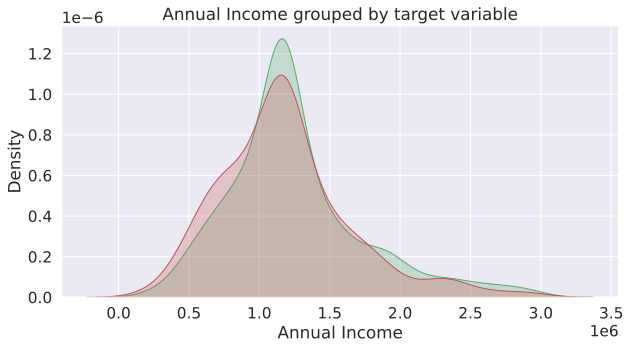

In [27]:
with_target_s = train_df[['Annual Income', 'Credit Default']].sample(1000)
s = with_target_s['Annual Income']
target_0 = s[with_target_s['Credit Default'] == 0]
target_1 = s[with_target_s['Credit Default'] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(target_0, shade=True, label='No default', color='g')
sns.kdeplot(target_1, shade=True, label='Default', color='r')

plt.xlabel('Annual Income')
plt.title('Annual Income grouped by target variable')
plt.show()



#### Tax Liens

In [28]:
train_df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

Очень странно! Очень много пропусков. Поэтому мы не станем отбирать этот признак для обучения.

#### Number of Open Accounts

In [29]:
train_df['Number of Open Accounts'].value_counts().sort_index()

2.0      28
3.0      95
4.0     212
5.0     325
6.0     504
7.0     613
8.0     638
9.0     728
10.0    677
11.0    692
12.0    562
13.0    465
14.0    420
15.0    313
16.0    265
17.0    232
18.0    143
19.0    139
20.0     93
21.0     78
22.0     49
23.0     59
24.0     50
25.0     32
26.0     12
27.0     14
28.0     14
29.0     10
30.0     11
31.0      6
32.0      6
33.0      6
34.0      2
35.0      1
37.0      2
38.0      1
41.0      1
42.0      1
43.0      1
Name: Number of Open Accounts, dtype: int64

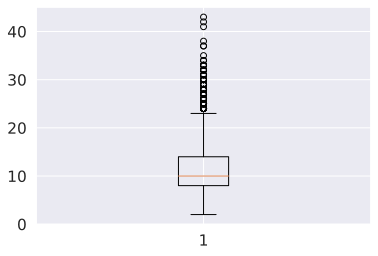

In [30]:
plt.boxplot(train_df['Number of Open Accounts'])
plt.show()

In [31]:
def number_of_open_accounts(df):
    df.loc[df['Number of Open Accounts'] > 23, 'Number of Open Accounts'] = df['Number of Open Accounts'].mode()[0]
    return

number_of_open_accounts(train_df)

In [32]:
train_df['Number of Open Accounts'].describe()

count    7500.000000
mean       10.719067
std         4.228931
min         2.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        23.000000
Name: Number of Open Accounts, dtype: float64

#### В разрезе с целевой переменной

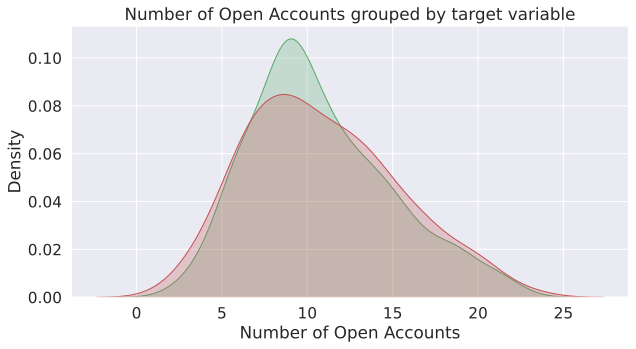

In [33]:
with_target_s = train_df[['Number of Open Accounts', 'Credit Default']].sample(1000)
s = with_target_s['Number of Open Accounts']
target_0 = s[with_target_s['Credit Default'] == 0]
target_1 = s[with_target_s['Credit Default'] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(target_0, shade=True, label='No default', color='g')
sns.kdeplot(target_1, shade=True, label='Default', color='r')

plt.xlabel('Number of Open Accounts')
plt.title('Number of Open Accounts grouped by target variable')
plt.show()

#### Years of Credit History

In [34]:
train_df['Years of Credit History'].describe()

count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.800000
max        57.700000
Name: Years of Credit History, dtype: float64

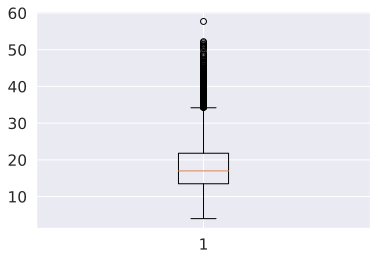

In [35]:
plt.boxplot(train_df['Years of Credit History'])
plt.show()

In [36]:
def years_of_credit_history(df):
    df.loc[df['Years of Credit History'] > 35, 'Years of Credit History'] = df['Years of Credit History'].median()
    return

years_of_credit_history(train_df)

In [37]:
train_df['Years of Credit History'].describe()

count    7500.000000
mean       17.722027
std         6.039439
min         4.000000
25%        13.500000
50%        17.000000
75%        21.100000
max        35.000000
Name: Years of Credit History, dtype: float64

#### Maximum Open Credit

In [38]:
train_df['Maximum Open Credit'].value_counts().sort_index()

0.000000e+00    65
4.334000e+03     1
6.556000e+03     1
6.622000e+03     1
1.089000e+04     1
                ..
4.092389e+07     1
5.756256e+07     1
2.655129e+08     1
3.800523e+08     1
1.304726e+09     1
Name: Maximum Open Credit, Length: 6963, dtype: int64

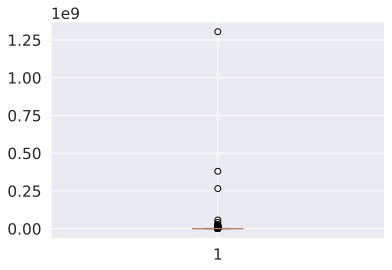

In [39]:
plt.boxplot(train_df['Maximum Open Credit'])
plt.show()

In [40]:
train_df = train_df[train_df['Maximum Open Credit'] < train_df['Maximum Open Credit'].quantile(.99)]

In [41]:
train_df.shape

(7425, 17)

#### Number of Credit Problems

In [42]:
train_df['Number of Credit Problems'].value_counts()

0.0    6395
1.0     881
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

#### Months since last delinquent

In [43]:
train_df['Months since last delinquent'].isna().sum()

4034

Очень много пропусков. В обучающей модели не используем.

#### Bankruptcies 	

In [44]:
train_df['Bankruptcies'].value_counts()

0.0    6585
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [45]:
train_df['Bankruptcies'].isna().sum()

14

In [46]:
train_df = train_df[train_df['Bankruptcies'].notnull()]
train_df = train_df[train_df['Bankruptcies'] < 3]

In [47]:
train_df.shape

(7402, 17)

#### Current Loan Amount

In [48]:
train_df['Current Loan Amount'].describe()

count    7.402000e+03
mean     1.182333e+07
std      3.186773e+07
min      2.147200e+04
25%      1.799490e+05
50%      3.082090e+05
75%      5.168735e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [49]:
train_df['Current Loan Amount'].value_counts().sort_index()

21472.0         2
21560.0         1
21582.0         1
21604.0         1
21626.0         1
             ... 
788480.0        2
788634.0        2
788942.0        1
789030.0        1
99999999.0    855
Name: Current Loan Amount, Length: 5329, dtype: int64

In [50]:
test_df['Current Loan Amount'].value_counts().sort_index()

15422.0         1
21450.0         1
21648.0         1
21670.0         1
21692.0         1
             ... 
786412.0        1
786632.0        1
787094.0        2
789096.0        1
99999999.0    297
Name: Current Loan Amount, Length: 2026, dtype: int64

In [51]:
def current_loan_amount(df):
    mean = df[df['Current Loan Amount'] != 99999999.0]['Current Loan Amount'].mean()
    mean = np.around(mean, 0)
    df.loc[df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = mean
    return 

current_loan_amount(train_df)

In [52]:
train_df['Current Loan Amount'].describe()

count      7402.000000
mean     307970.439071
std      170346.765757
min       21472.000000
25%      179949.000000
50%      307970.000000
75%      395648.000000
max      789030.000000
Name: Current Loan Amount, dtype: float64

#### Current Credit Balance

In [53]:
train_df['Current Credit Balance'].describe()

count    7.402000e+03
mean     2.739006e+05
std      2.480669e+05
min      0.000000e+00
25%      1.137578e+05
50%      2.074800e+05
75%      3.537182e+05
max      2.913707e+06
Name: Current Credit Balance, dtype: float64

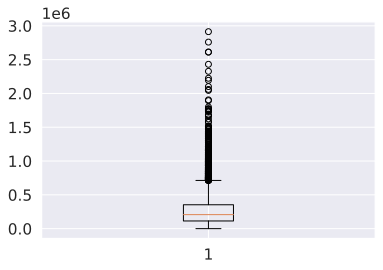

In [54]:
plt.boxplot(train_df['Current Credit Balance'])
plt.show()

Это и логично. Максимальное значение текущей суммы 789030, при этом текущий баланс есть значения около 3 млн. Гипотетически такое конечно возможно в результате долгой неуплаты и роста процентов, но скорее всего здесь ошибка. Лучше заменить на медиальное значение или моду, возможно что в конкретном данном случае можно заменить и на 75й персентиль.

In [55]:
train_df['Current Credit Balance'].median()

207480.0

In [56]:
def current_credit_balance(df):
    med = train_df['Current Credit Balance'].median()
    df.loc[df['Current Credit Balance'] > train_df['Current Loan Amount'].max(), 'Current Credit Balance'] = med
    return

current_credit_balance(train_df)

In [57]:
train_df['Current Credit Balance'].describe()

count      7402.000000
mean     239321.345852
std      169874.256870
min           0.000000
25%      113757.750000
50%      207451.500000
75%      322810.000000
max      788481.000000
Name: Current Credit Balance, dtype: float64

#### Monthly Debt

In [58]:
train_df['Monthly Debt'].describe()

count      7402.00000
mean      18193.93799
std       11652.81471
min           0.00000
25%       10061.25000
50%       15998.50000
75%       23705.00000
max      110311.00000
Name: Monthly Debt, dtype: float64

In [59]:
train_df['Monthly Debt'].value_counts().sort_index()

0.0         5
17.0        1
21.0        1
42.0        1
57.0        1
           ..
94674.0     1
95508.0     1
96177.0     1
100091.0    1
110311.0    1
Name: Monthly Debt, Length: 6635, dtype: int64

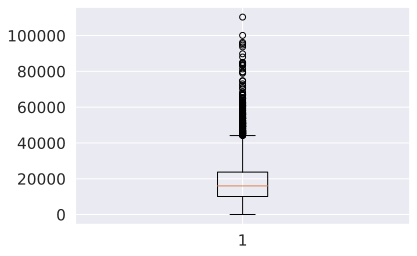

In [60]:
plt.boxplot(train_df['Monthly Debt'])
plt.show()

In [61]:
def monthly_debt(df):
    med = df['Monthly Debt'].median()
    df.loc[(df['Monthly Debt'] > 45000), 'Monthly Debt'] = med
    return

monthly_debt(train_df)

In [62]:
train_df['Monthly Debt'].describe()

count     7402.000000
mean     16949.302688
std       9261.750040
min          0.000000
25%      10061.250000
50%      15997.750000
75%      22427.250000
max      44899.000000
Name: Monthly Debt, dtype: float64

#### Credit Score

In [63]:
train_df['Credit Score'].describe()

count    5861.000000
mean     1152.478075
std      1606.912507
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [64]:
train_df['Credit Score'].value_counts().sort_index()

585.0     1
586.0     1
588.0     1
589.0     1
590.0     1
         ..
7470.0    4
7480.0    6
7490.0    1
7500.0    2
7510.0    2
Name: Credit Score, Length: 268, dtype: int64

In [65]:
train_df['Credit Score'].isna().sum()

1541

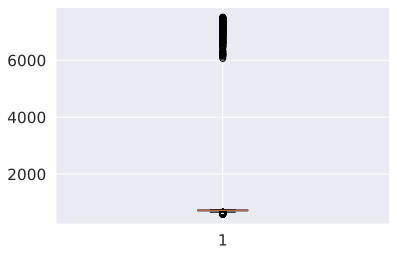

In [66]:
df = train_df[train_df['Credit Score'].notnull()]
plt.boxplot(df['Credit Score'])
plt.show()

In [67]:
del df

In [68]:
def credit_score(df):
    mod = df['Credit Score'].mode()[0]
    df.loc[df['Credit Score'] > 6000, 'Credit Score'] = mod
    df.loc[df['Credit Score'].isnull(), 'Credit Score'] = mod
    return

credit_score(train_df)

In [69]:
train_df['Credit Score'].isna().sum()

0

In [70]:
train_df['Credit Score'].describe()

count    7402.000000
mean      725.639557
std        25.289461
min       585.000000
25%       718.000000
50%       738.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64

In [71]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [72]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 


### Отбор признаков

In [73]:
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,307970.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,307970.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [74]:
NUMERIC_FEATURE_NAMES = [
    'Annual Income', 
    'Number of Open Accounts', 
    'Years of Credit History', 
    'Maximum Open Credit',
    'Number of Credit Problems',
    'Bankruptcies',
    'Current Loan Amount',
    'Current Credit Balance',
    'Monthly Debt',
    'Credit Score'
]

CATEGORIIAL_FEATURE_NAMES = [
    'Home Ownership',
    'Purpose',
    'Term'
]
FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + CATEGORIIAL_FEATURE_NAMES

### Нормализация данных

In [75]:
scaler = StandardScaler()

df_norm = train_df.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df = df_norm.copy()

### Разбиение на train & test

In [76]:
X = df[FEATURE_NAMES_SELECTED]
y = df['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=21)

### Балансировка целевой переменной

In [77]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default')
    
df_balanced['Credit Default'].value_counts()

0    3942
1    3218
Name: Credit Default, dtype: int64

In [78]:
X_train = df_balanced.drop(columns='Credit Default')
y_train = df_balanced['Credit Default']

### Построение и оценка модели

In [79]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()


In [80]:
model = catb.CatBoostClassifier(
    eval_metric='AUC',
    silent=True, 
    random_state=55, 
    one_hot_max_size=31, 
    depth=7, 
    iterations=400,
    l2_leaf_reg=9,
    learning_rate=0.15,
    metric_period=100
)
model.fit(X_train, y_train, cat_features=CATEGORIIAL_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3942
           1       0.98      0.99      0.98      3218

    accuracy                           0.99      7160
   macro avg       0.98      0.99      0.99      7160
weighted avg       0.99      0.99      0.99      7160

TEST

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1363
           1       0.49      0.49      0.49       488

    accuracy                           0.73      1851
   macro avg       0.66      0.66      0.66      1851
weighted avg       0.73      0.73      0.73      1851

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1118  245
1                249  239


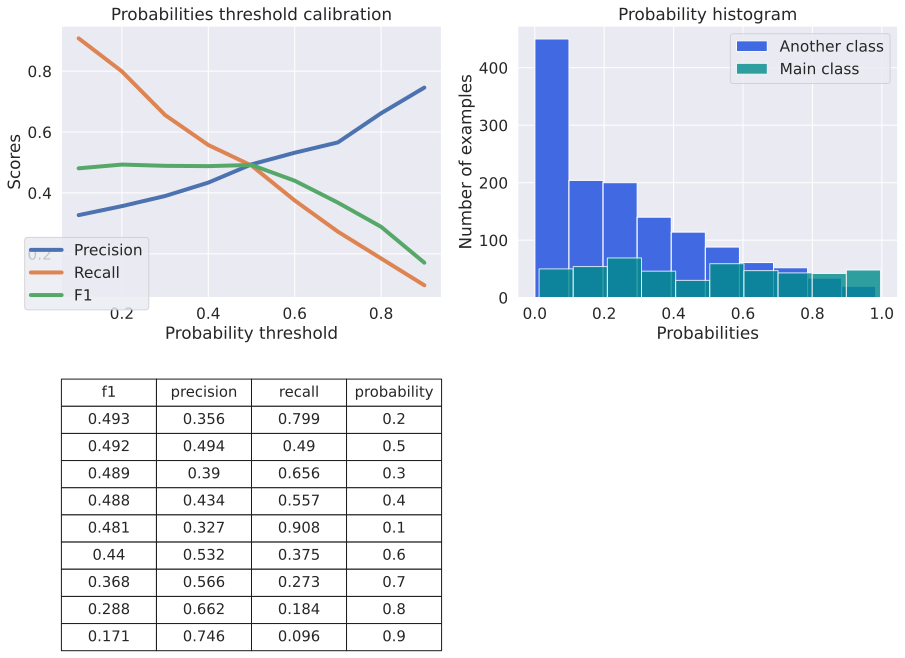

In [81]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

### Подготовка тестовых данных

In [82]:
test_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


In [83]:
test_df.isna().sum()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [84]:
annual_income(test_df)

In [85]:
number_of_open_accounts(test_df)

In [86]:
years_of_credit_history(test_df)

In [87]:
test_df.loc[test_df['Bankruptcies'] > 3, 'Bankruptcies'] = 1

In [88]:
test_df.loc[test_df['Bankruptcies'].isnull(), 'Bankruptcies'] = 1

In [89]:
current_loan_amount(test_df)

In [90]:
current_credit_balance(test_df)

In [91]:
monthly_debt(test_df)

In [92]:
credit_score(test_df)

In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2500 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [94]:
test_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.226424e+06,0.035200,10.840400,17.658960,7.105704e+05,0.162000,34.181261,0.103600,312891.202800,239378.826400,17171.259000,727.237200
std,4.763798e+05,0.386291,4.263496,6.138613,1.511983e+06,0.559894,22.024277,0.322659,171470.766449,171004.272655,9401.180874,26.046457
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,15422.000000,0.000000,93.000000,585.000000
25%,9.365622e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,187126.500000,110114.500000,10024.750000,717.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,312891.000000,207380.250000,16642.250000,738.000000
75%,1.402314e+06,0.000000,13.000000,21.400000,8.025985e+05,0.000000,50.000000,0.000000,398893.000000,327607.500000,23179.000000,746.000000
max,2.972417e+06,15.000000,23.000000,35.000000,5.448439e+07,15.000000,82.000000,3.000000,789096.000000,787892.000000,44898.000000,751.000000


In [95]:
test_df = test_df[FEATURE_NAMES_SELECTED]

### Формирование предсказаний на тестовых данных

In [96]:
predictions = model.predict(test_df)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [97]:
pred_df = pd.DataFrame()
pred_df['Credit Default'] = predictions
pred_df.sample(10)

,Credit Default
2274,0
587,0
2043,1
2016,0
1117,0
784,0
1489,1
1875,0
2367,1
2134,0


In [98]:
pred_df['Credit Default'].value_counts()

0    1955
1     545
Name: Credit Default, dtype: int64

In [99]:
pred_df.to_csv('predictions.csv', index=0)